## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_type_counts[application_type_counts < 500].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_value_counts = application_df['CLASSIFICATION'].value_counts()
classification_value_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt_1 = classification_value_counts.loc[classification_value_counts > 1]
classification_counts_gt_1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts_type = dict(application_df['CLASSIFICATION'].value_counts())

classifications_to_replace = [x for x in classification_counts_type if classification_counts_type[x] < 1000]
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
df_application_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION','CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])
df_application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [11]:
# Split our preprocessed data into our features and target arrays
y = df_application_dummies['IS_SUCCESSFUL'].values
X = df_application_dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
print(X_train_scaled[:1])
print(X_test_scaled[:1])

[[ 0.00881785 -0.0318352  -0.09094115  7.92661753 -0.17857931 -1.94139192
  -0.21583439 -0.18440702 -0.19007898 -0.1464315  -0.1487688   1.09139424
  -0.04368605 -1.08398489 -0.0324146  -0.00881785 -0.01870803  0.99325861
  -0.40670099 -0.46547551 -0.24279507 -0.2413554  -0.26559323 -0.10490262
  -0.06493162 -0.01079982  0.46590815 -0.4415478   1.53536574 -0.11778608
  -0.03529198 -1.48226738  0.64012967 -0.1487688  -0.12710794 -0.32918556
  -0.08464603 -0.17210159 -0.35158665 -0.06553264 -0.07209119  0.02858365
  -0.02858365]]
[[ 0.00881785 -0.0318352  -0.09094115 -0.12615722 -0.17857931  0.51509434
  -0.21583439 -0.18440702 -0.19007898 -0.1464315  -0.1487688  -0.91625918
  -0.04368605  0.92252208 -0.0324146  -0.00881785 -0.01870803 -1.00678714
   2.45880884 -0.46547551 -0.24279507 -0.2413554  -0.26559323 -0.10490262
  -0.06493162 -0.01079982  0.46590815 -0.4415478  -0.65131061 -0.11778608
  -0.03529198  0.67464212  0.64012967 -0.1487688  -0.12710794 -0.32918556
  -0.08464603 -0.17210

## Compile, Train and Evaluate the Model

Key optimizations in the second model include:  
  Enhanced complexity via a third hidden layer for improved pattern recognition.  
  Extended training to 120 epochs for increased learning iterations.  
  Layer-specific activation functions (ReLU, Tanh) for optimized performance.   
  Real-time evaluation on 20% unseen data using validation split."  

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Input layer features
# Define Deep Neural Network Model with Additional Hidden Layer


# Initialize Sequential Model
nn = tf.keras.models.Sequential()


# Input Layer Features
input_dim = X_train_scaled.shape[1]


# First Hidden Layer (Input Layer)
nn.add(tf.keras.layers.Dense(
    units=80, 
    input_dim=input_dim, 
    activation='relu'
))  # ReLU activation


# Second Hidden Layer
nn.add(tf.keras.layers.Dense(
    units=30, 
    activation="tanh"
))  # Tanh activation


# Third Hidden Layer (Newly Added)
nn.add(tf.keras.layers.Dense(
    units=15, 
    activation="tanh"
))  # Tanh activation


# Output Layer (Binary Classification)
nn.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))  # Sigmoid activation


# Print Model Summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])


In [16]:

# Train the Model
history = nn.fit(
    X_train_scaled, 
    y_train, 
    epochs=120, 
    validation_split=0.2
)


# Display History Keys (Optional)
print(history.history.keys())


Epoch 1/120


2024-10-15 23:44:54.675743: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


644/644 [==============================] - 1s 725us/step - loss: 0.5698 - accuracy: 0.7172 - val_loss: 0.5664 - val_accuracy: 0.7174
Epoch 2/120
644/644 [==============================] - 0s 628us/step - loss: 0.5561 - accuracy: 0.7259 - val_loss: 0.5600 - val_accuracy: 0.7265
Epoch 3/120
644/644 [==============================] - 0s 625us/step - loss: 0.5532 - accuracy: 0.7298 - val_loss: 0.5581 - val_accuracy: 0.7287
Epoch 4/120
644/644 [==============================] - 0s 642us/step - loss: 0.5514 - accuracy: 0.7288 - val_loss: 0.5557 - val_accuracy: 0.7314
Epoch 5/120
644/644 [==============================] - 0s 624us/step - loss: 0.5505 - accuracy: 0.7293 - val_loss: 0.5570 - val_accuracy: 0.7287
Epoch 6/120
644/644 [==============================] - 0s 655us/step - loss: 0.5493 - accuracy: 0.7295 - val_loss: 0.5544 - val_accuracy: 0.7312
Epoch 7/120
644/644 [==============================] - 0s 618us/step - loss: 0.5479 - accuracy: 0.7308 - val_loss: 0.5570 - val_accuracy: 0.72

In [17]:
# Evaluate the model using the test data


# Evaluate Model Performance on Test Data
model_loss, model_accuracy = nn.evaluate(
    X_test_scaled, 
    y_test, 
    verbose=2
)


# Print Evaluation Results
print(f"Loss: {model_loss:.4f}, Accuracy: {model_accuracy*100:.2f}%")

268/268 - 0s - loss: 0.5593 - accuracy: 0.7310 - 184ms/epoch - 685us/step
Loss: 0.5593, Accuracy: 73.10%


In [18]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimisation_V1.h5")

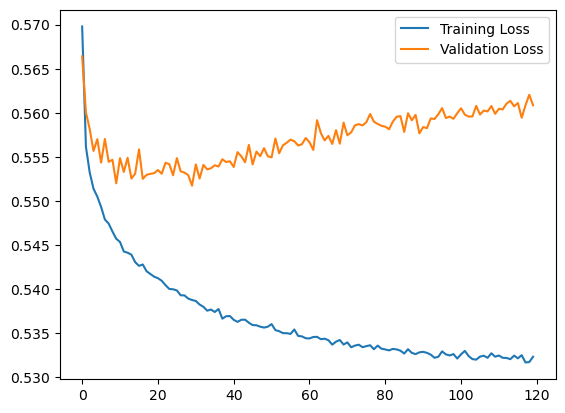

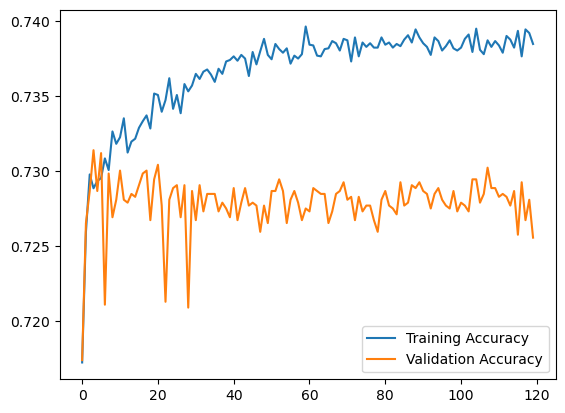

In [19]:
# Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Observations:
#### Training Accuracy: Increases steadily, reaching around 80% accuracy.
#### Validation Accuracy: Increases initially, then plateaus around epoch 50-70, and slightly decreases towards the end.
#### Gap between Training and Validation Accuracy: The gap increases over time, indicating some overfitting.
### Comparison to Chart1:
#### Consistent Overfitting: Both charts show overfitting, confirming the need for regularization.
#### Validation Metric: Validation accuracy plateaus, while validation loss increases (Chart1).

### Suggestions:
#### Regularization: Implement dropout (0.5-0.6) and/or L1/L2 regularization (0.01-0.1).
#### Early Stopping: Use early stopping with a patience of 10-15 epochs.
#### Data Augmentation: Explore data balancing, feature engineering, or data augmentation.